# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:

suppressPackageStartupMessages({
  library(multcomp)
  library(car)
  library(tidyr)
  library(lme4)
  library(ggplot2)
  library(ggtext)
  library(ggpmisc)
  library(nlme)
  library(latex2exp)
  library(kableExtra)
  library(broom)
  library(dplyr)
  library(MuMIn)
})

options(warn = -1)
RES <- readRDS("~/Documents/Master Thesis/Master-Thesis-P-kinetics/data/RES.rds")
D <- RES$D
d <- RES$data


Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS+Env} )$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

In [ ]:

library(GGally)

ggpairs(D, 
  aes(col=Site, shape = Treatment,alpha = 0.6), 
  columns = c("soil_0_20_P_AAE10", "soil_0_20_P_CO2", "PS", "k", "kPS"),
  lower = list(continuous = wrap("points", size = 1.3)),
  upper = list(continuous = "blank", combo = "blank", discrete = "blank"))  # Adjust size here
  




p6 <- ggplot(D,aes(y=soil_0_20_P_AAE10, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) + 
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{H_2O10}(mg/kg Soil)$"),
         y=TeX("$P_{AAEDTA}(mg/kg Soil)$")); p6
  
p7 <- ggplot(D,aes(y=PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
          y=TeX("$PS(mg/kg Soil)$")); p7

p8 <- ggplot(D,aes(y=k, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$")); p8

p9 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$v=k*PS(mg/s*kg Soil)$"));p9


p11 <- ggplot(D,aes(y=PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$PS(mg/kg Soil)$")); p11

p12 <- ggplot(D,aes(y=k, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
   scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$"))

p12

p13 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$log(v)=log(k*PS)(mg/s*kg Soil)$"))

p13


Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

wir sind abe nicht an einem Treatment effekt interesseiert. drum verwerfen wir Treatment als Random UND Fixed effekt.

1.  Vergleiche PS, k und kPS mit


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.07061429 0.9095703

           R2m       R2c
[1,] 0.3680394 0.8251728

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01104564 0.3620402

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01391747 0.3596733

            R2m       R2c
[1,] 0.05114188 0.2399041

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.02721952 0.2448253

boundary (singular) fit: see help('isSingular')

            R2m      R2c
[1,] 0.01708162 0.484134

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: Ymain_norm ~ k * log(PS) + (1 | year) + (1 | Site) + (1 | Site:block)
   Data: D
 Subset: Treatment == "P0"

REML criterion at convergence: 209.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5723 -0.2209  0.0187  0.3483  3.8086 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept) 0.0000   0.0000  
 year       (Intercept) 0.1024   0.3200  
 Site       (Intercept) 0.1634   0.4042  
 Residual               0.2935   0.5418  
Number of obs: 120, groups:  Site:block, 20; year, 6; Site, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  1.738343   2.071122 12.765971   0.839    0.417
k           -1.488991  11.262130 12.439272  -0.132    0.897
log(PS)      0.104222   0.606923 12.181857   0.172    0.866
k:log(PS)    0.006624   3.296268 12.185270   0.002    0.998

Correlation of Fixed Effects:
          (Intr) k   

            R2m       R2c
[1,] 0.03937992 0.3521636

          R2m      R2c
[1,] 0.218175 0.358219

           R2m       R2c
[1,] 0.1976951 0.4740521

           R2m       R2c
[1,] 0.2204812 0.3650344

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01391747 0.3596733

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

              GVIF Df GVIF^(1/(2*Df))
k         12.64859  1        3.556485
log(PS)   12.32336  1        3.510465
crop       1.05128  4        1.006271
k:log(PS) 29.55436  1        5.436392

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

                            GVIF Df GVIF^(1/(2*Df))
scale(k)                1.130309  1        1.063160
scale(log(PS))          1.074904  1        1.036776
crop                    1.051280  4        1.006271
scale(k):scale(log(PS)) 1.019256  1        1.009582

            GVIF Df GVIF^(1/(2*Df))
k       1.121012  1        1.058778
log(PS) 1.069713  1        1.034270
crop    1.050571  4        1.006186

                GVIF Df GVIF^(1/(2*Df))
I(k * (PS)) 4.642883  1        2.154735
k           2.035796  1        1.426813
log(PS)     4.711359  1        2.170567
crop        1.052981  4        1.006474

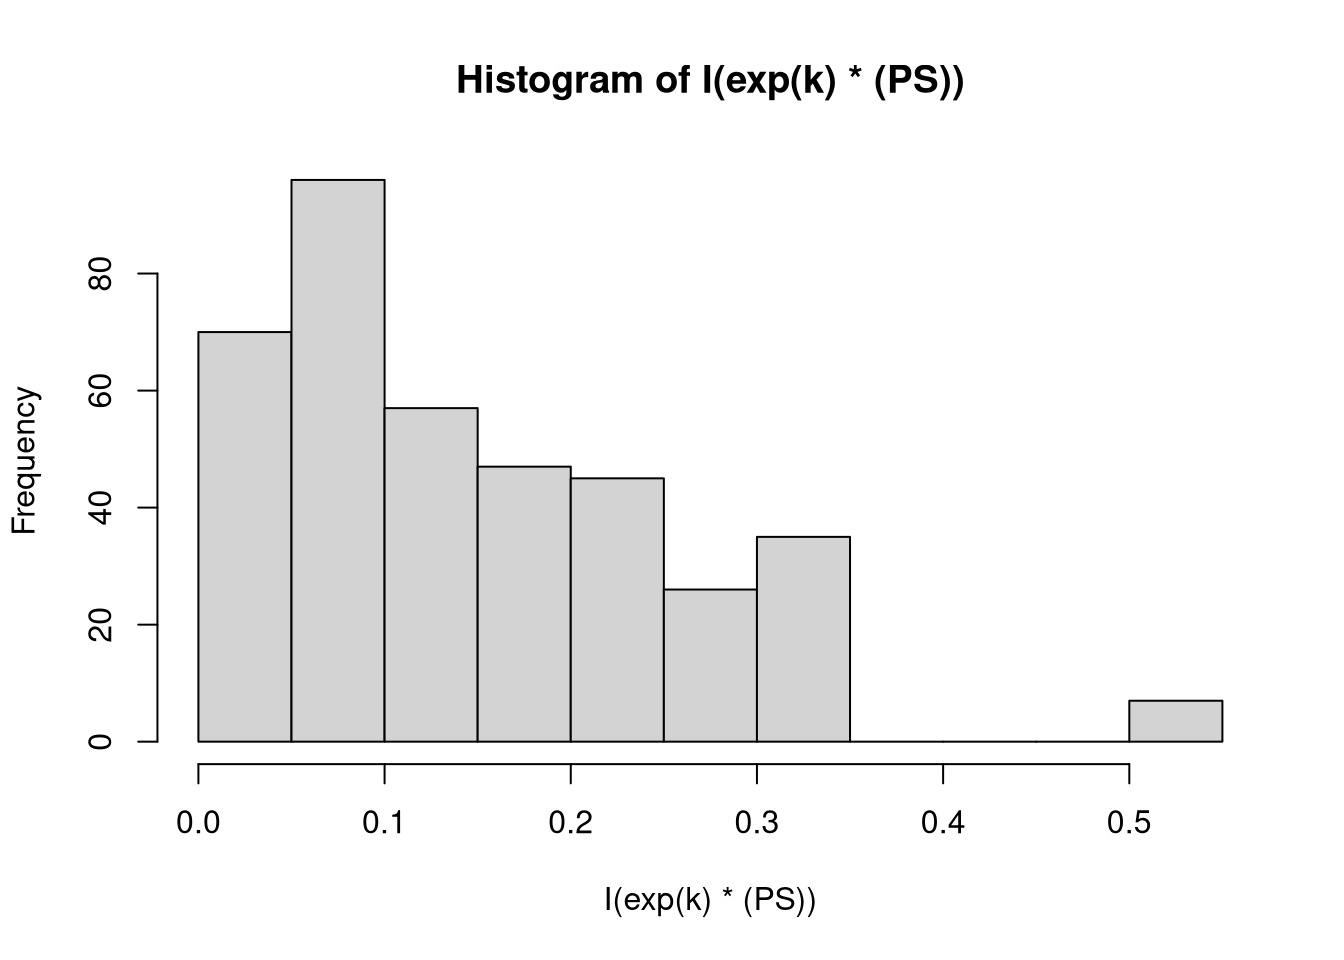

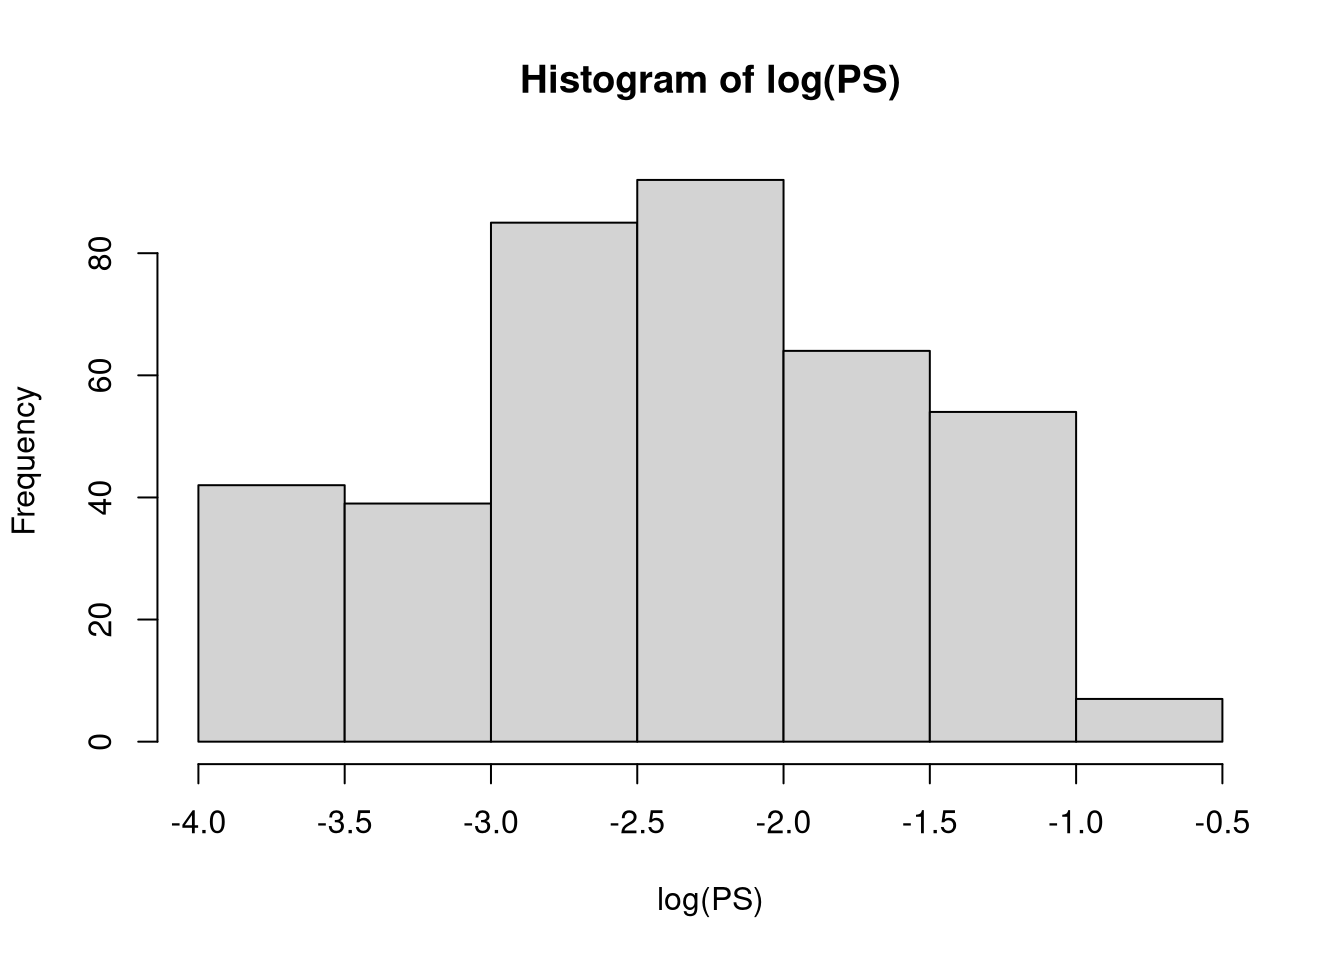

            R2m       R2c
[1,] 0.01391747 0.3596733

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.002084 0.002084     1 38.034  0.0569 0.81268  
soil_0_20_pH_H2O 0.000134 0.000134     1 37.385  0.0037 0.95209  
soil_0_20_Corg   0.161220 0.161220     1 31.904  4.4047 0.04384 *
soil_0_20_silt   0.004848 0.004848     1 38.673  0.1324 0.71789  
Feox             0.001153 0.001153     1  4.473  0.0315 0.86689  
Alox             0.012462 0.012462     1  3.340  0.3405 0.59664  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = log(PS) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Feox + Alox + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)
(Intercept) == 0      -4.315860   2.020856  -2.136    0.175
soil_0_20_clay == 0   -0.007323   0.030690  -0.239    1.000
soil_0_20_pH_H2O == 0 -0.007811   0.129128  -0.060    1.000
soil_0_20_Corg == 0    0.635283   0.302698   2.099    0.189
soil_0_20_silt == 0   -0.010246   0.028153  -0.364    0.999
Feox == 0             -0.052740   0.297170  -0.177    1.000
Alox == 0              0.603062   1.033522   0.584    0.989
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0118462 0.0118462     1 39.973 10.7210 0.002191 **
soil_0_20_pH_H2O 0.0011812 0.0011812     1 38.291  1.0690 0.307664   
soil_0_20_Corg   0.0090425 0.0090425     1 35.487  8.1836 0.007040 **
soil_0_20_silt   0.0012705 0.0012705     1 10.804  1.1498 0.306957   
Feox             0.0000004 0.0000004     1  0.968  0.0003 0.988188   
Alox             0.0004765 0.0004765     1  1.117  0.4312 0.620552   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + Feox + Alox + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)   
(Intercept) == 0       0.608405   0.351212   1.732  0.37789   
soil_0_20_clay == 0   -0.016659   0.005088  -3.274  0.00661 **
soil_0_20_pH_H2O == 0 -0.022256   0.021526  -1.034  0.84780   
soil_0_20_Corg == 0    0.137353   0.048014   2.861  0.02574 * 
soil_0_20_silt == 0    0.004093   0.003818   1.072  0.82630   
Feox == 0              0.001024   0.054815   0.019  1.00000   
Alox == 0             -0.128860   0.196235  -0.657  0.97801   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.27384 0.27384     1 37.928  3.2643 0.078744 . 
soil_0_20_pH_H2O 0.00989 0.00989     1 37.700  0.1179 0.733264   
soil_0_20_Corg   0.63136 0.63136     1 32.622  7.5260 0.009801 **
soil_0_20_silt   0.00591 0.00591     1 39.205  0.0705 0.792012   
Feox             0.04398 0.04398     1  6.812  0.5242 0.493160   
Alox             0.00897 0.00897     1  4.047  0.1069 0.759894   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Feox + Alox + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0      -5.22226    2.66516  -1.959   0.2476  
soil_0_20_clay == 0   -0.08506    0.04708  -1.807   0.3307  
soil_0_20_pH_H2O == 0 -0.06835    0.19908  -0.343   0.9993  
soil_0_20_Corg == 0    1.29049    0.47040   2.743   0.0356 *
soil_0_20_silt == 0   -0.01141    0.04296  -0.266   0.9998  
Feox == 0              0.24847    0.34319   0.724   0.9653  
Alox == 0              0.36678    1.12170   0.327   0.9995  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
k         10361.3 10361.3     1 243.49  7.0248 0.008566 **
log(PS)    9132.5  9132.5     1 243.72  6.1918 0.013504 * 
k:log(PS) 12026.0 12026.0     1 243.87  8.1535 0.004668 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
k         0.182097 0.182097     1 229.90  0.6950 0.4053
log(PS)   0.029224 0.029224     1 229.48  0.1115 0.7387
k:log(PS) 0.232300 0.232300     1 229.46  0.8866 0.3474

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k         35.305  35.305     1 247.74  0.5252 0.4693
log(PS)   39.586  39.586     1 248.15  0.5889 0.4436
k:log(PS) 53.624  53.624     1 248.29  0.7978 0.3726

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
soil_0_20_clay   0.009850 0.009850     1 37.545  0.3382 0.5643
soil_0_20_pH_H2O 0.039312 0.039312     1 35.853  1.3498 0.2530
soil_0_20_Corg   0.036439 0.036439     1 29.511  1.2512 0.2724
soil_0_20_silt   0.025477 0.025477     1 38.291  0.8748 0.3555
Feox             0.002090 0.002090     1  5.362  0.0718 0.7988
Alox             0.000145 0.000145     1  3.535  0.0050 0.9476

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.03920 0.03920     1 32.118  1.6338   0.21034    
soil_0_20_pH_H2O 0.00006 0.00006     1 36.110  0.0025   0.96047    
soil_0_20_Corg   0.55961 0.55961     1 37.514 23.3242 2.319e-05 ***
soil_0_20_silt   0.08151 0.08151     1 33.313  3.3975   0.07421 .  
Feox             0.01402 0.01402     1  3.547  0.5843   0.49229    
Alox             0.07387 0.07387     1  2.696  3.0791   0.18781    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
k          411.53  411.53     1 228.31  2.6679    0.1038    
log(PS)   2451.67 2451.67     1 236.98 15.8941 8.925e-05 ***
k:log(PS)  335.79  335.79     1 232.66  2.1769    0.1414    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ k * log(PS) + (1 | year) + (1 | Site) + (1 |  
    Site:block)
   Data: D

REML criterion at convergence: 2172.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2416 -0.5978  0.0314  0.5493  2.8712 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)  20.33    4.508  
 year       (Intercept)  59.32    7.702  
 Site       (Intercept)  23.97    4.896  
 Residual               154.25   12.420  
Number of obs: 274, groups:  Site:block, 16; year, 6; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   43.833     10.402 146.531   4.214 4.37e-05 ***
k             84.993     52.035 228.313   1.633    0.104    
log(PS)       16.947      4.251 236.979   3.987 8.92e-05 ***
k:log(PS)     33.029     22.386 232.660   1.475    0.141    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

           R2m       R2c
[1,] 0.5718185 0.7438699

            R2m       R2c
[1,] 0.06433359 0.6476313

            R2m       R2c
[1,] 0.02182182 0.4385486

            R2m       R2c
[1,] 0.01391747 0.3596733

In [ ]:


# Wovon hängen Modelparameter ab?

library(lmerTest)


Since we now model two measurement methods, we do not expect correlations by Site/year/etc

In [ ]:
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.grud.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.grud.CO2.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)
fit.grud.AAE10.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_AAE10) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -0.61404    0.20562  -2.986  0.00514 ** 
log(soil_0_20_P_CO2) == 0    1.30106    0.05963  21.819  < 0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.24892    0.05163  -4.821  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.074843   0.026807   2.792  0.00991 ** 
log(soil_0_20_P_CO2) == 0   -0.031362   0.007774  -4.034  < 0.001 ***
log(soil_0_20_P_AAE10) == 0  0.029663   0.006731   4.407  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -2.89619    0.20538 -14.102   <0.001 ***
log(soil_0_20_P_CO2) == 0    1.12637    0.05956  18.912   <0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.10426    0.05157  -2.022    0.072 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Ymain_rel ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) + (1 |  
    year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1735.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.00402 -0.57958 -0.01179  0.54121  2.77443 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   4.36    2.088  
 Site:Treatment (Intercept)  17.59    4.194  
 year           (Intercept) 161.25   12.698  
 Site           (Intercept)  66.35    8.145  
 Residual                   194.82   13.958  
Number of obs: 212, groups:  
Site:block, 16; Site:Treatment, 12; year, 5; Site, 4

Fixed effects:
                                            Estimate Std. Error      df t value
(Intercept)                                  130.274     26.637  54.210   4.891
log(soil_0_20_P_CO2)                          23.091     13

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_uptake ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1841.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2119 -0.4370 -0.0545  0.4055  4.8125 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 1.076e-08 0.0001037
 Site:Treatment (Intercept) 6.076e-08 0.0002465
 year           (Intercept) 7.371e+01 8.5853293
 Site           (Intercept) 2.547e+01 5.0466063
 Residual                   6.700e+01 8.1853038
Number of obs: 259, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                                            Estimate Std. Error       df
(Intercept)                                  30.6322    12.8437 109.2745
log(soil_0_20_P_CO2)                          8.0686     6.0243 2

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 2125.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3368 -0.5446  0.0639  0.5584  2.8114 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 0.000e+00 0.000e+00
 Site:Treatment (Intercept) 4.332e+02 2.081e+01
 year           (Intercept) 5.794e+01 7.612e+00
 Site           (Intercept) 1.874e-07 4.329e-04
 Residual                   1.149e+02 1.072e+01
Number of obs: 274, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                                            Estimate Std. Error       df
(Intercept)                                   3.6487    21.0770 216.6228
log(soil_0_20_P_CO2)                         -2.4421    10.7384 

              R2m       R2c
[1,] 0.0008591812 0.8105528

           R2m       R2c
[1,] 0.0648535 0.6229641

           R2m       R2c
[1,] 0.0776019 0.5955972

In [ ]:
create_coef_table <- function(lmer_models, 
                              covariate_order = NULL, 
                              covariate_labels = NULL, # NEU: Benannter Vektor für Zeilennamen
                              model_labels = NULL) {   # NEU: Benannter Vektor für Spaltennamen

  # Extract coefficients and p-values (Ihre Originalfunktion, keine Änderung hier)
  extract_coef_info <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    coef_matrix <- summary(model)|> coef()
    estimates <- coef_matrix[, 1]
    p_values <- coef_matrix[, ncol(coef_matrix)]
    formatted_coef <- sapply(seq_along(estimates), function(i) {
      est_str <- sprintf("%.3f", estimates[i])
      stars <- if (p_values[i] < 0.001) "***" else
               if (p_values[i] < 0.01) "** " else
               if (p_values[i] < 0.05) "* " else  ""
      paste0(stars, est_str)
    })
    names(formatted_coef) <- rownames(coef_matrix)
    return(formatted_coef)
  }

  # Extract R-squared values (Ihre Originalfunktion, keine Änderung hier)
  extract_r_squared <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    r2_values <- MuMIn::r.squaredGLMM(model) # MuMIn:: hinzugefügt für Klarheit
    return(c(
      R2m = sprintf("%.3f", r2_values[1, "R2m"]),
      R2c = sprintf("%.3f", r2_values[1, "R2c"])
    ))
  }

  # Daten extrahieren (Ihr Originalcode)
  all_coefs <- lapply(lmer_models, extract_coef_info)
  all_r_squared <- lapply(lmer_models, extract_r_squared)
  all_covariate_names <- unique(unlist(lapply(all_coefs, names)))

  if (is.null(covariate_order)) {
    covariate_order <- c("(Intercept)", sort(all_covariate_names[all_covariate_names != "(Intercept)"]))
  }
  covariate_order <- covariate_order[covariate_order %in% all_covariate_names]
  final_order <- c(covariate_order, "R2m", "R2c")

  # Matrix erstellen (Ihr Originalcode)
  results_matrix <- matrix("",
                           nrow = length(final_order),
                           ncol = length(lmer_models),
                           dimnames = list(final_order, names(lmer_models)))

  # Matrix füllen (Ihr Originalcode)
  for (model_name in names(lmer_models)) {
    model_coefs <- all_coefs[[model_name]]
    for (covar in names(model_coefs)) {
      if (covar %in% covariate_order) {
        results_matrix[covar, model_name] <- model_coefs[covar]
      }
    }
    r2_values <- all_r_squared[[model_name]]
    results_matrix["R2m", model_name] <- r2_values["R2m"]
    results_matrix["R2c", model_name] <- r2_values["R2c"]
  }

  # --- NEU: Zeilen- und Spaltennamen ersetzen ---
  
  # Ersetze die Zeilennamen (Kovariaten), falls covariate_labels übergeben wurde
  if (!is.null(covariate_labels)) {
    # Finde die Übereinstimmungen in den aktuellen Zeilennamen
    row_matches <- match(rownames(results_matrix), names(covariate_labels))
    # Ersetze nur die, die gefunden wurden
    new_rownames <- rownames(results_matrix)
    new_rownames[!is.na(row_matches)] <- covariate_labels[row_matches[!is.na(row_matches)]]
    rownames(results_matrix) <- new_rownames
  }
  
  # Ersetze die Spaltennamen (Modelle), falls model_labels übergeben wurde
  if (!is.null(model_labels)) {
    col_matches <- match(colnames(results_matrix), names(model_labels))
    new_colnames <- colnames(results_matrix)
    new_colnames[!is.na(col_matches)] <- model_labels[col_matches[!is.na(col_matches)]]
    colnames(results_matrix) <- new_colnames
  }
  
  # --- Ende der neuen Sektion ---

  # Convert to data frame for kable
  results_df <- data.frame("Response" = rownames(results_matrix),
                           results_matrix,
                           check.names = FALSE, # Verhindert, dass R Spaltennamen ändert
                           stringsAsFactors = FALSE)
  
  results_df
}


  Response                   PS             k   log(k\*PS)      CO2         AAE10
  ------------------ ---------- ------------- ------------ -------- -------------
  (Intercept)            -4.316         0.608       -5.222   -2.539         3.794
  Alox                    0.603        -0.129        0.367    0.051        -1.568
  Feox                   -0.053         0.001        0.248    0.058         0.195
  soil_0_20_clay         -0.007   \*\* -0.017       -0.085    0.015        -0.035
  soil_0_20_Corg       \* 0.635    \*\* 0.137   \*\* 1.290    0.277   \*\*\*1.453
  soil_0_20_pH_H2O       -0.008        -0.022       -0.068    0.126         0.006
  soil_0_20_silt         -0.010         0.004       -0.011   -0.022        -0.046
  R2m                     0.100         0.204        0.071    0.074         0.421
  R2c                     0.954         0.963        0.910    0.925         0.975

  : Coefficient Table for Soil covariates. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05


  -----------------------------------------------------------------------------------------------------------------------------------------------------------------
  Response                                         Yn-STP-CO2   Yn-STP-AAE10   Yn-STP-GRUD   Yn-Kinetic      Yr-STP-CO2   Yr-STP-AAE10     Yr-STP-GRUD   Yr-Kinetic
  --------------------------------------------- ------------- -------------- ------------- ------------ --------------- -------------- --------------- ------------
  (Intercept)                                     \*\*\*1.059    \*\*\*0.532   \*\*\*1.096        0.980   \*\*\*104.862   \*\*\*75.343   \*\*\*130.274       56.375

  k                                                                                               2.262                                                \*\* 377.498

  k:log(PS)                                                                                       0.931                                                \*\* 171.507

  log(PS)                                                                                        -0.063                                                  \* -27.486

  log(soil_0_20_P_AAE10)                                         \*\*\*0.120        -0.006                                  \*\* 7.111          -6.537 

  log(soil_0_20_P_CO2)                            \*\*\*0.162                        0.137                   \*\* 8.853                         23.091 

  log(soil_0_20_P_CO2):log(soil_0_20_P_AAE10)                                        0.016                                                      -3.110 

  R2m                                                   0.218          0.198         0.220        0.014           0.074          0.063           0.078        0.022

  R2c                                                   0.358          0.474         0.365        0.360           0.569          0.537           0.596        0.439
  -----------------------------------------------------------------------------------------------------------------------------------------------------------------

  : Coefficient Table for Ynorm and Yrel. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05


`geom_smooth()` using formula = 'y ~ x'

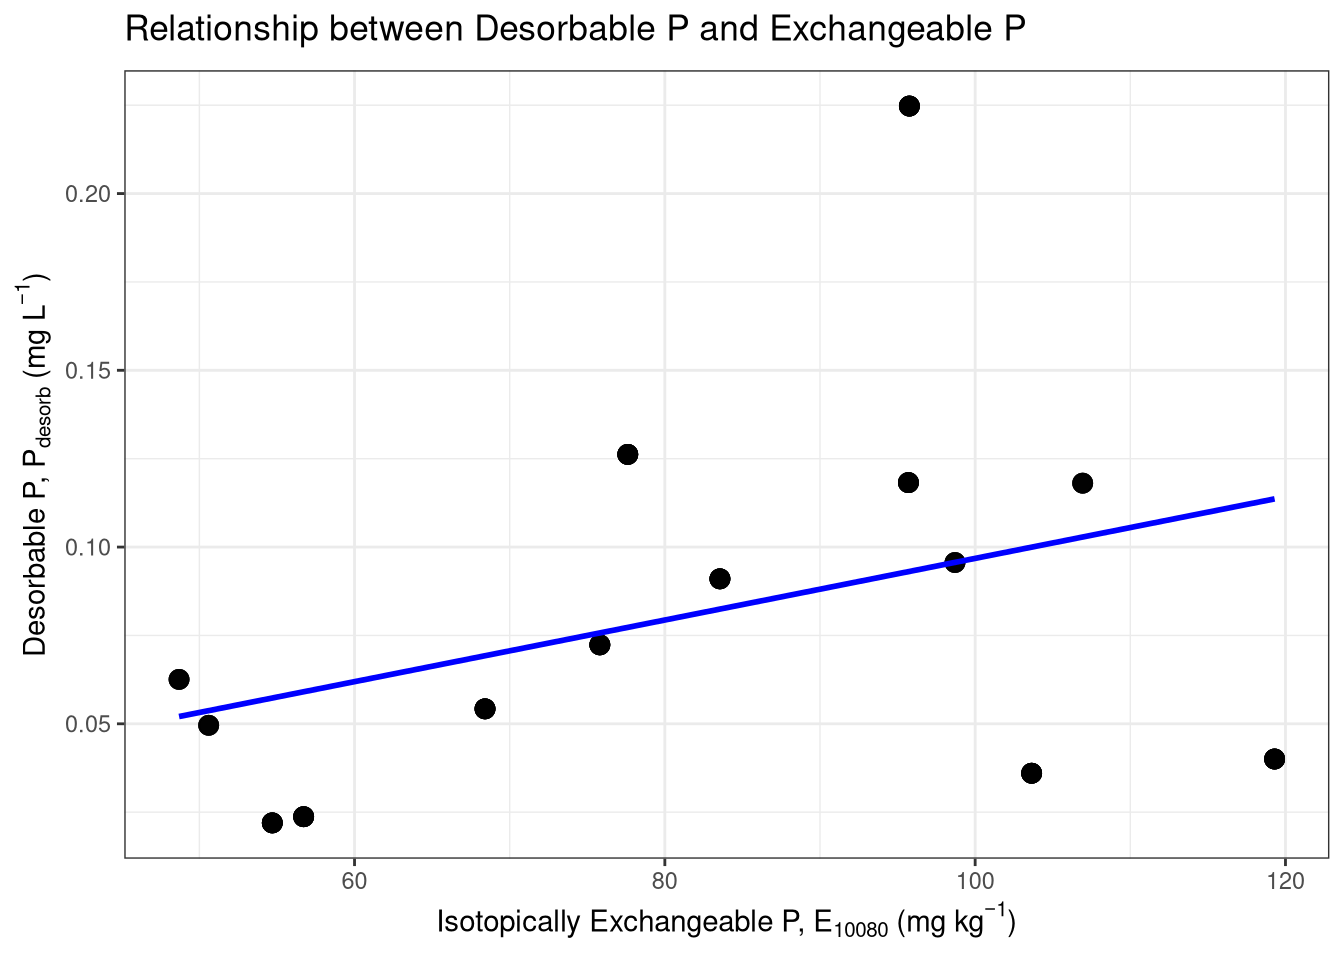

[1] "Spearman correlation between PS and E_exp_10080:"


    Spearman's rank correlation rho

data:  correlation_data$PS and correlation_data$E_exp_10080
S = 63135, p-value = 0.0001128
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.404355 

`geom_smooth()` using formula = 'y ~ x'

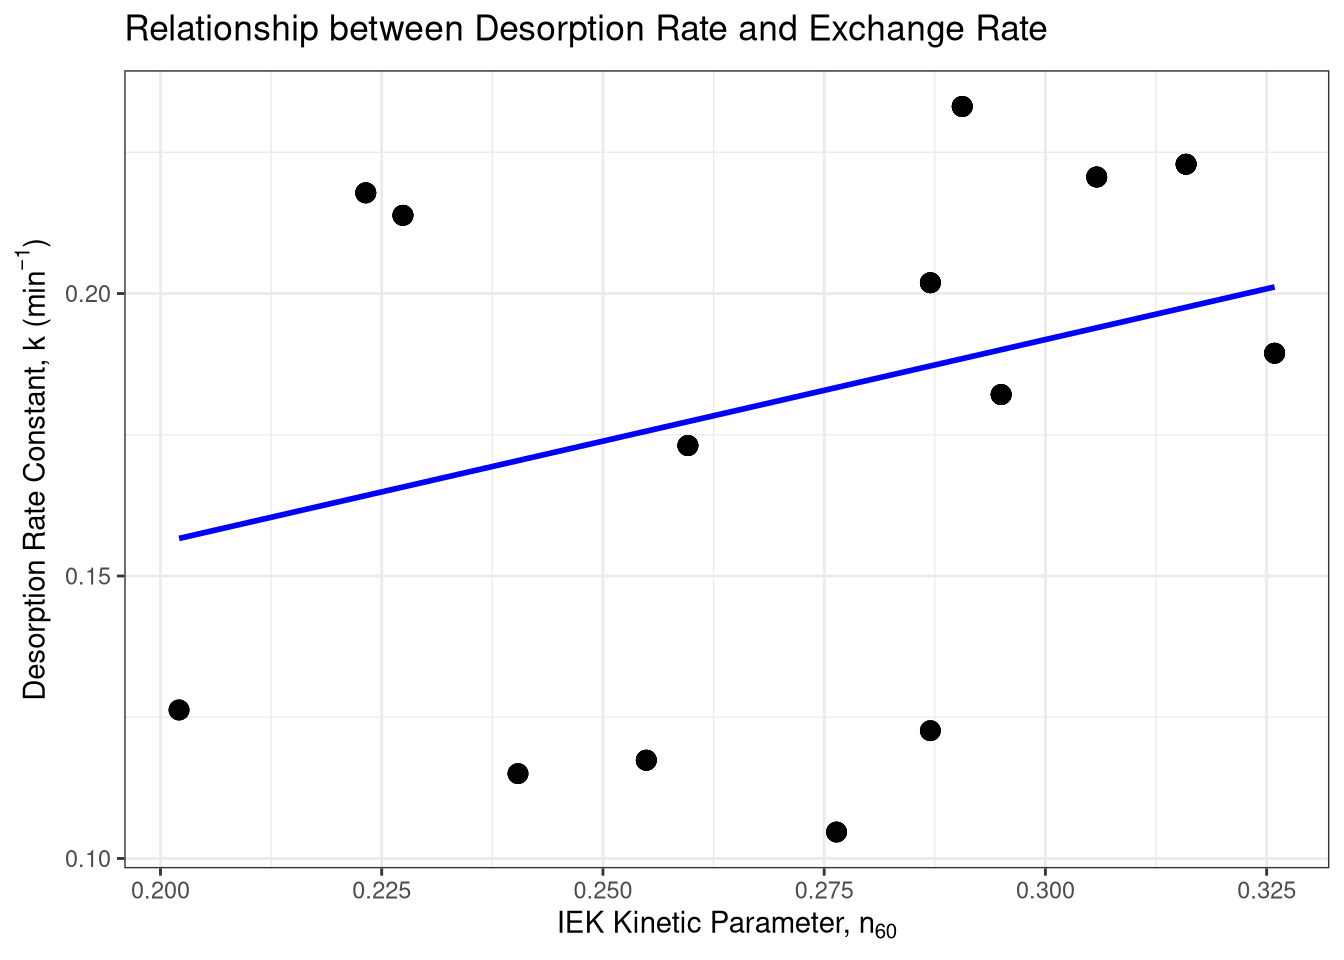

[1] "Spearman correlation between k and n_60:"


    Spearman's rank correlation rho

data:  correlation_data$k and correlation_data$n_1440
S = 67681, p-value = 0.0006275
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3614673 

In [ ]:
lmer_models <- list(
  PS = fit.soil.PS,
  k = fit.soil.k,
  'log(k*PS)' = fit.soil.kPS,
  CO2 = fit.soil.CO2,
  AAE10 = fit.soil.AAE10
)



coef_table_soil <- create_coef_table(lmer_models)
kable(coef_table_soil,
row.names = FALSE,
align = c("l", rep("r", ncol(coef_table_soil) - 1)),
escape = FALSE,
caption = "Coefficient Table for Soil covariates. 
Significant codes:  0 '\\*\\*\\*' 0.001 '\\*\\*' 0.01 '\\*' 0.05")
